# scikit-learn (사이킷 런) 라이브러리 소개
- https://scikit-learn.org/stable/
- 추천 시스템 입문편: https://www.inflearn.com/course/추천-시스템-입문편

# 데이터 및 과제 소개

### **목표**

1. 숫자 이미지 데이터를 분석
2. 숫자 데이터를 모델에 훈련시키고 새로운 이미지에 대해 무슨 숫자인지 맞출 수 있는 간단한 모델 만들기

**참고 자료:**
* https://www.kaggle.com/c/digit-recognizer/overview
* Computer Vision: https://en.wikipedia.org/wiki/Computer_vision

In [ ]:
# scikit-learn 업데이트
!pip install --upgrade scikit-learn

In [ ]:
import pandas as pd

# 시각화 라이브러리
import seaborn as sns            # 통계적 데이터 시각화
import matplotlib.pyplot as plt  # 그래프 및 플롯 생성

# 머신러닝
from sklearn.ensemble import RandomForestClassifier   # 앙상블 학습. 트리를 조합하는 성능의 분류 '모델'.
from sklearn.model_selection import train_test_split  # 모델 훈련&평가. 테스트 세트 나누는 '함수'.
# from sklearn.metrics import plot_confusion_matrix     # 모델 성능 평가. 혼동 행렬 시각화 '함수'. 필요x
from sklearn.metrics import confusion_matrix          # 모델 성능 평가. 혼동 행렬 계산 '함수'.

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/digit-recognizer/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/digit-recognizer/test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [ ]:
print(train)
# print(test)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

Text(0.5, 1.0, 'label: 4')

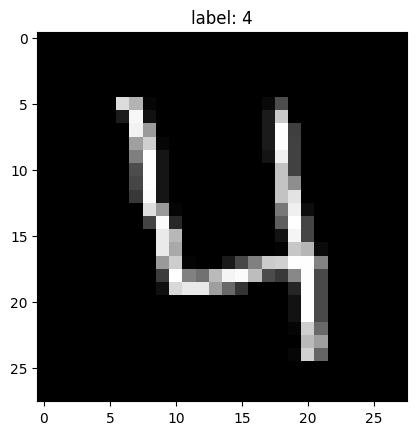

In [ ]:
idx = 3
plt.imshow(train.iloc[idx, 1:].values.reshape(28, 28), cmap='gray')
plt.title(f'label: {train.iloc[idx, 0]}')

# 탐색적 데이터 분석

<Axes: >

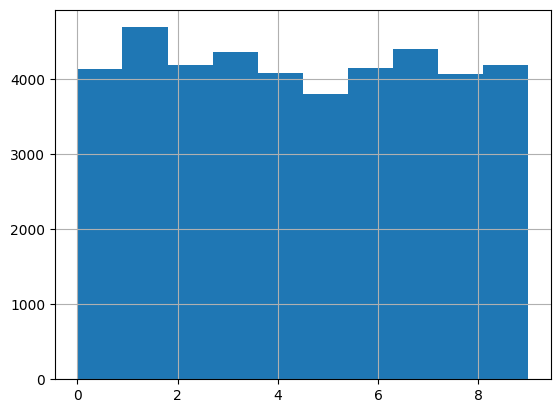

In [ ]:
train['label'].hist()

# 모델 만들기

In [ ]:
X_train = train.iloc[:, 1:]  # train 데이터의 특성(features)
Y_train = train.iloc[:, 0]   # train 데이터의 레이블(labels)
X_test = test                # 모델이 예측할 데이터

In [ ]:
# 전처리
train_image, vali_image, train_labels, vali_labels = train_test_split(X_train.copy(), Y_train.copy(), train_size=0.8, random_state=42)

# 훈련 데이터 : X_train, Y_train
# 훈련 세트 : train_image, train_labels
# 검증 세트 : vali_image, vali_labels

In [ ]:
# 모델 생성
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(train_image, train_labels)

# n_estimators=100: 랜덤 포레스트에 사용될 트리의 개수
# random_state=42: 난수 생성 시드

RandomForestClassifier(random_state=42)

# 모델 평가

In [ ]:
vali_pred = forest.predict(vali_image)

[Text(0.5, 58.7222222222222, 'Predicted Label'),
 Text(120.72222222222221, 0.5, 'True Label')]

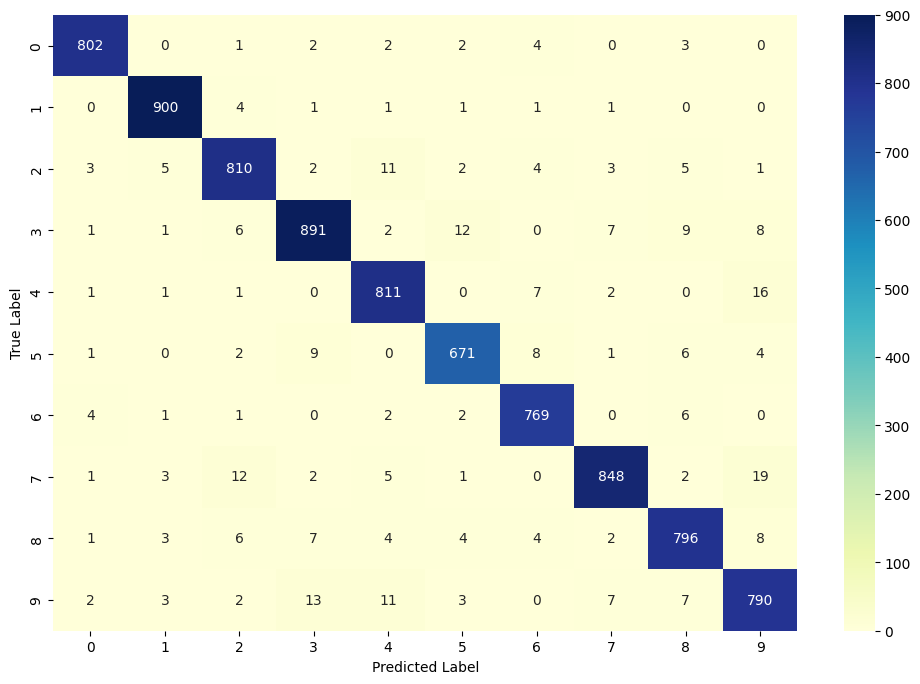

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(confusion_matrix(vali_labels, vali_pred), cmap='YlGnBu', annot=True, fmt='d')
ax.set(xlabel='Predicted Label', ylabel='True Label')

### 모델은 어디에서 실수를 했을까?

In [ ]:
vali_all = vali_image.copy()

In [ ]:
vali_all.loc[:, 'labels'] = vali_labels
vali_all.loc[:, 'pred'] = vali_pred

In [ ]:
true_4 = vali_all['labels'] == 4
pred_9 = vali_all['pred'] == 9

sample = vali_all[true_4 & pred_9].copy()

In [ ]:
sample.index

Int64Index([20628, 26182, 27363,  6112,  8960, 38924, 29210, 21115, 13976,
               43, 27943,  6885, 28063, 22202, 10544, 14971],
           dtype='int64')

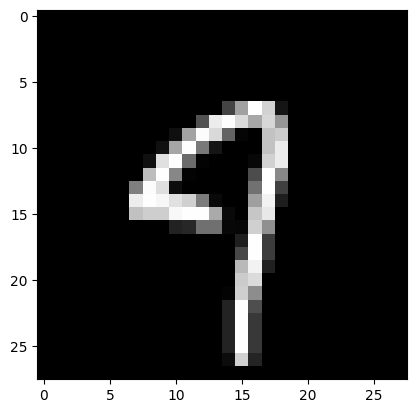

In [ ]:
idx = 26182
plt.imshow(vali_image.loc[idx, :].values.reshape(28, 28), cmap='gray')

# 예측

In [ ]:
pred = forest.predict(X_test)

In [ ]:
X_test['pred'] = pred

3


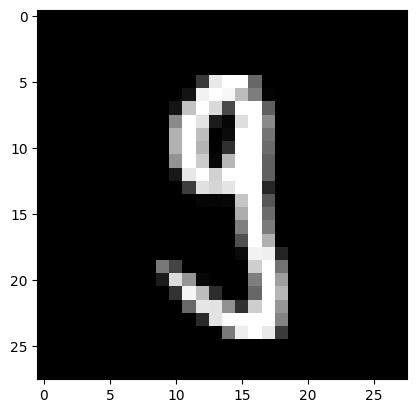

In [ ]:
idx = 101
print(X_test.iloc[idx, -1])
plt.imshow(X_test.iloc[idx, :-1].values.reshape(28, 28), cmap='gray')